In [4]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [5]:
import tensorflow as tf
from tensorflow import keras

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Specify the paths of the train, validation, and test directories
train_dir = '/content/drive/MyDrive/PGDA/DL/Class/Exam/Shoe_classification/train'
test_dir = '/content/drive/MyDrive/PGDA/DL/Class/Exam/Shoe_classification/test'

In [7]:
# List the files and directories within the train_dir directory
files = os.listdir(train_dir)

# Check if any files or directories exist within train_dir
if len(files) > 0:
    print("Data has been successfully uploaded to train_dir.")
else:
    print("No files or directories found in train_dir.")

Data has been successfully uploaded to train_dir.


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
# Creating Validation dataset [ Run the below code after removing the commad { # }, to create a validation dataset if you dont have it in the first place]

In [10]:
# # Here we need to run this only once if there is no validation dataset. After running once the validation set will be created amd we dont need to run this again and again

# from sklearn.model_selection import train_test_split
# import os
# import shutil

# # Path to the original training directory
# train_dir = '/content/drive/MyDrive/PGDA/DL/Class/Exam/Shoe_classification/train'

# # Path to the directory where you want to create the validation subset
# base_dir = '/content/drive/MyDrive/PGDA/DL/Class/Exam/Shoe_classification'
# validation_dir = os.path.join(base_dir, 'validation')

# # Create the validation directory if it doesn't exist
# os.makedirs(validation_dir, exist_ok=True)

# # List all subdirectories (class folders) in the original training directory
# class_folders = [folder for folder in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, folder))]

# # Loop through each class folder and create a validation subset
# for class_folder in class_folders:
#     class_source_dir = os.path.join(train_dir, class_folder)
#     class_dest_dir = os.path.join(validation_dir, class_folder)

#     # Split the class folder into training and validation subsets
#     train_class_folder, val_class_folder = train_test_split(os.listdir(class_source_dir), test_size=0.1, random_state=42)

#     # Create the validation class folder if it doesn't exist
#     os.makedirs(class_dest_dir, exist_ok=True)

#     # Move images from the training class folder to the validation class folder
#     for file_name in val_class_folder:
#         src = os.path.join(class_source_dir, file_name)
#         dst = os.path.join(class_dest_dir, file_name)
#         shutil.move(src, dst)

print("Validation subset created successfully.")


Validation subset created successfully.


In [11]:
validation_dir = '/content/drive/MyDrive/PGDA/DL/Class/Exam/Shoe_classification/validation'

In [12]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,          ## flow_from_directory will feed images to train_generator in batches of 20.
        class_mode='categorical')

Found 699 images belonging to 3 classes.
Found 79 images belonging to 3 classes.


In [13]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [14]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))     ## The input shape over here will be 75,75 because of Maxpooling
model.add(layers.MaxPooling2D((2, 2)))                      ## Adding Maxpool in conv2D will continue to reduce the dimension.

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(3, activation='softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [16]:
from tensorflow.keras import optimizers

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=34,   ## batch size is 20, 699 images in train, 699/20 = 34.95, ie, 34 will be steps per epoch
      epochs=20,             ## Iterative
      validation_data=validation_generator,
      validation_steps=3)   ## 79 images, hence steps= 79/20= 3.95 , ie, 3

<ipython-input-17-9352d017bd10>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/20
34/34 [==============================] - 446s 13s/step - loss: 0.6344 - accuracy: 0.7025 - val_loss: 0.2713 - val_accuracy: 0.8833
Epoch 2/20
34/34 [==============================] - 2s 65ms/step - loss: 0.3004 - accuracy: 0.8822 - val_loss: 0.1765 - val_accuracy: 0.9167
Epoch 3/20
34/34 [==============================] - 2s 71ms/step - loss: 0.2637 - accuracy: 0.8792 - val_loss: 0.1556 - val_accuracy: 0.9500
Epoch 4/20
34/34 [==============================] - 3s 74ms/step - loss: 0.2228 - accuracy: 0.9131 - val_loss: 0.0878 - val_accuracy: 0.9833
Epoch 5/20
34/34 [==============================] - 3s 79ms/step - loss: 0.1737 - accuracy: 0.9352 - val_loss: 0.2431 - val_accuracy: 0.9333
Epoch 6/20
34/34 [==============================] - 2s 63ms/step - loss: 0.1416 - accuracy: 0.9470 - val_loss: 0.1621 - val_accuracy: 0.9667
Epoch 7/20
34/34 [==============================] - 2s 57ms/step - loss: 0.1002 - accuracy: 0.9676 - val_loss: 0.0841 - val_accuracy: 0.9833
Epoch 8/20
3

In [20]:
print(os.getcwd())

/content


In [21]:
model.save("model.h5")

In [22]:
from tensorflow import keras

tr_model = keras.models.load_model('/content/model.h5')  # Load your trained model here


In [23]:
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

objective_dir = test_dir
image_paths = [os.path.join(objective_dir, filename) for filename in os.listdir(objective_dir)]

predictions = []

for image_path in image_paths:
    img = load_img(image_path, target_size=(150, 150))
    img_array = img_to_array(img)
    img_array = img_array.reshape((1,) + img_array.shape)  # Reshape for prediction
    prediction = model.predict(img_array)
    predictions.append(prediction)

predictions = np.array(predictions)


1/1 [==============================] - 0s 18ms/step


In [24]:
predictions

array([[[1.0000000e+00, 0.0000000e+00, 0.0000000e+00]],

       [[1.0000000e+00, 0.0000000e+00, 0.0000000e+00]],

       [[1.0000000e+00, 0.0000000e+00, 0.0000000e+00]],

       [[1.0000000e+00, 0.0000000e+00, 0.0000000e+00]],

       [[0.0000000e+00, 1.0000000e+00, 0.0000000e+00]],

       [[0.0000000e+00, 0.0000000e+00, 1.0000000e+00]],

       [[1.0000000e+00, 0.0000000e+00, 0.0000000e+00]],

       [[1.0000000e+00, 0.0000000e+00, 0.0000000e+00]],

       [[1.0000000e+00, 0.0000000e+00, 0.0000000e+00]],

       [[0.0000000e+00, 1.0000000e+00, 0.0000000e+00]],

       [[1.0000000e+00, 0.0000000e+00, 0.0000000e+00]],

       [[1.0000000e+00, 0.0000000e+00, 0.0000000e+00]],

       [[0.0000000e+00, 0.0000000e+00, 1.0000000e+00]],

       [[1.0000000e+00, 0.0000000e+00, 0.0000000e+00]],

       [[1.0000000e+00, 0.0000000e+00, 0.0000000e+00]],

       [[1.0000000e+00, 0.0000000e+00, 0.0000000e+00]],

       [[1.0000000e+00, 0.0000000e+00, 0.0000000e+00]],

       [[1.0000000e+00, 0.00000

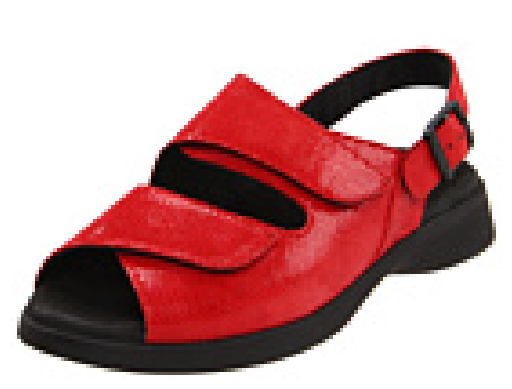

In [25]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
import os

objective_dir = test_dir
image_filenames = os.listdir(objective_dir)

if image_filenames:
    first_image_path = os.path.join(objective_dir, image_filenames[45])
    img = load_img(first_image_path)

    plt.imshow(img)
    plt.axis('off')  # Turn off axis numbers and ticks
    plt.show()
else:
    print("No images found in the objective directory.")



In [26]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np

# ... (displaying image code)

# Prepare the displayed image for prediction
img_array = img_to_array(img)
img_array = img_array / 255.0  # Rescale pixel values (assuming your training data was rescaled)

# Resize the image to match the target size used during training
img_array = tf.image.resize(img_array, (150, 150))

# Expand dimensions to match the input shape of your model
img_array = np.expand_dims(img_array, axis=0)

# Make prediction
prediction = model.predict(img_array)

# Interpret prediction
class_index = np.argmax(prediction)
class_labels = ['boots', 'sandals', 'slippers']
predicted_class = class_labels[class_index]

print("Predicted Class:", predicted_class)



1/1 [==============================] - 0s 18ms/step
Predicted Class: sandals


**We have successfully predicted 45th index ( which is a sandle ) as sandle itself**

**Now we are creating a function to print the image and the predicted class.**

In [31]:
def show(index):

  import matplotlib.pyplot as plt
  from tensorflow.keras.preprocessing.image import load_img
  import os

  objective_dir = test_dir
  image_filenames = os.listdir(objective_dir)

  try:

    if image_filenames:
        first_image_path = os.path.join(objective_dir, image_filenames[index])
        img = load_img(first_image_path)

        plt.imshow(img)
        plt.axis('off')  # Turn off axis numbers and ticks
        plt.show()
    else:
        print("No images found in the objective directory.")

  except:
    return "Out of range list"

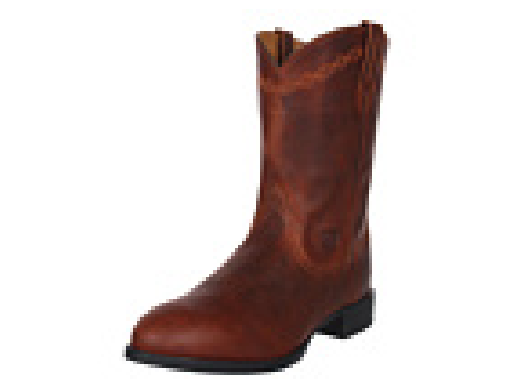

In [34]:
show (15)

In [50]:
def predict(index):

  from tensorflow.keras.preprocessing.image import img_to_array, load_img
  import numpy as np


  objective_dir = test_dir
  image_filenames = os.listdir(objective_dir)

  if image_filenames:
      first_image_path = os.path.join(objective_dir, image_filenames[index])
      img = load_img(first_image_path)



  # ... (displaying image code)

  # Prepare the displayed image for prediction
  img_array = img_to_array(img)
  img_array = img_array / 255.0  # Rescale pixel values (assuming your training data was rescaled)

  # Resize the image to match the target size used during training
  img_array = tf.image.resize(img_array, (150, 150))

  # Expand dimensions to match the input shape of your model
  img_array = np.expand_dims(img_array, axis=0)

  # Make prediction
  prediction = model.predict(img_array)

  # Interpret prediction
  class_index = np.argmax(prediction)
  class_labels = ['boots', 'sandals', 'slippers']
  predicted_class = class_labels[class_index]

  return print("Predicted Class:", predicted_class)

In [51]:
predict(15)

1/1 [==============================] - 0s 19ms/step
Predicted Class: boots


### Final Output

In [53]:
predict(42)

1/1 [==============================] - 0s 30ms/step
Predicted Class: slippers


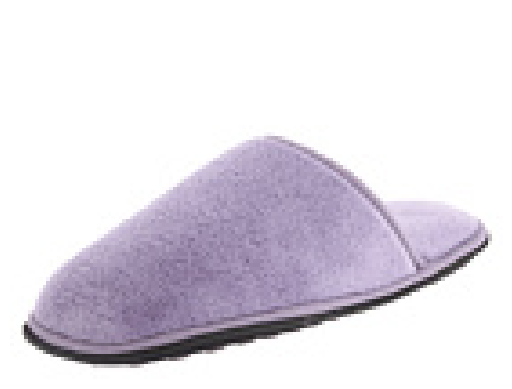

In [54]:
show(42)

In [55]:
predict(8)

1/1 [==============================] - 0s 19ms/step
Predicted Class: boots


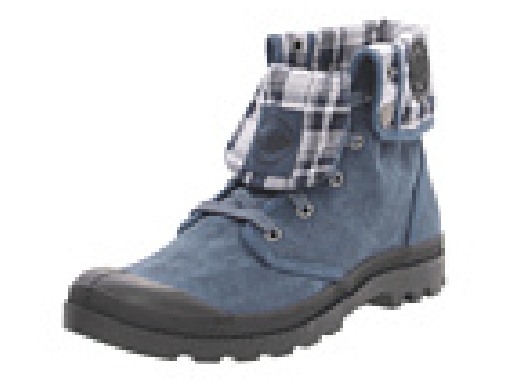

In [56]:
show(8)

# **Thankyou**